In [42]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

csvfile = "Data_training.csv"  #file name 


In [43]:
data_test= pd.read_csv(csvfile)
data_test.head()

,Episode,Kick_Speed,friction,Rewards,Stop_Distance
0,0,65.46,0.9,-1036.68,-6.15
1,1,39.78,0.9,-206.17,64.61
2,2,45.49,0.9,-108.30,45.77
3,3,58.09,0.9,-16.66,21.77
4,4,38.86,0.9,-199.59,64.09


In [3]:
profile = ProfileReport(data_test, minimal=True)
profile.to_file(output_file="output.html")

In [3]:
failed = data_test[data_test['Stop_Distance'] <= 0]
passed = data_test[data_test['Stop_Distance'] >0]

print('Size of crashes :',failed.shape[0])  
print('Size of success :',passed.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")

failed.to_csv("crashed.csv",index=False)
failed.head()

Size of crashes : 383
Size of success : 4618
Percentage of crash cases:7.66 %
Percentage of not crashed cases:92.34 %


,Episode,Kick_Speed,friction,Rewards,Stop_Distance
0,0,65.46,0.9,-1036.68,-6.15
80,80,62.58,0.9,-1024.86,-0.59
108,108,67.01,0.9,-1044.09,-8.27
233,233,65.81,0.9,-1040.93,-8.01
317,317,63.00,0.9,-1037.16,-5.10


In [23]:
#passed.to_csv("not_crashed.csv",index=False  )
#passed.head()

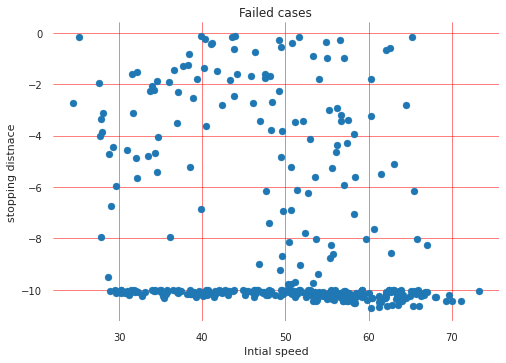

In [4]:
fig=plt.figure
plt.scatter(failed["Kick_Speed"],failed["Stop_Distance"],label='Line 2')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("Intial speed")
plt.ylabel("stopping distnace")
plt.show()

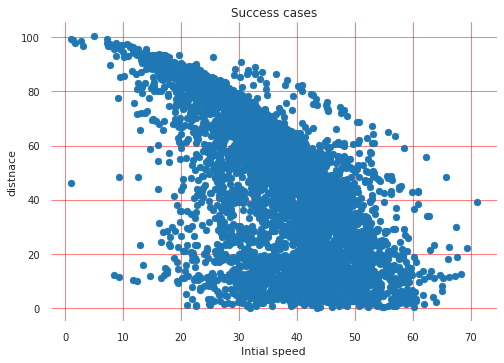

In [5]:
fig=plt.figure
plt.scatter(passed["Kick_Speed"],passed["Stop_Distance"])
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Success cases")
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.show()


In [6]:
data_test.loc[data_test['Stop_Distance'] <= 0, 'test'] = int(1)
data_test.loc[data_test['Stop_Distance'] > 0, 'test'] = int(0)
data_test.head()

,Episode,Kick_Speed,friction,Rewards,Stop_Distance,test
0,0,65.46,0.9,-1036.68,-6.15,1.0
1,1,39.78,0.9,-206.17,64.61,0.0
2,2,45.49,0.9,-108.30,45.77,0.0
3,3,58.09,0.9,-16.66,21.77,0.0
4,4,38.86,0.9,-199.59,64.09,0.0


Total number of episodes: 5001
Number of Pass: 289
Number of fail: 11


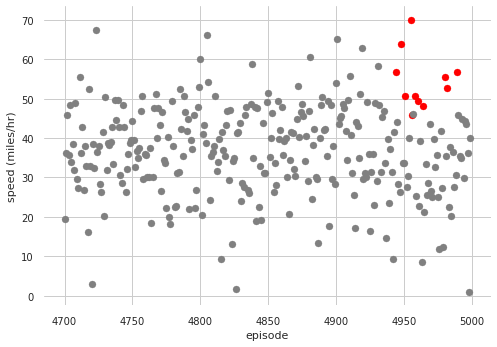

In [38]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=4700;
end=5000

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['Kick_Speed'].values.tolist()[start:end])

indices = test == 0
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# Bad values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# Good values
ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
#ax.set_ylim([0,75])
plt.xlabel('episode')
plt.ylabel('speed (miles/hr)')
ax.grid(True) 
plt.show()

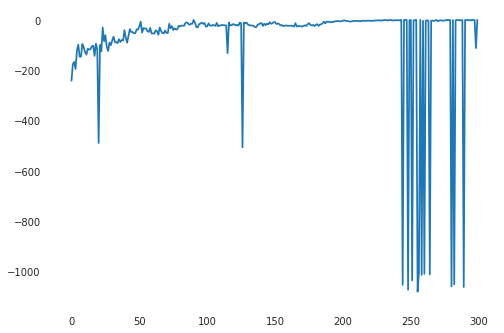

In [39]:
plt.plot(data_test["Rewards"].values.tolist()[start:end])

In [21]:
for i in range(3) :
 print(crashed_final[-1-i])
print(crashed_final.shape[0])

NameError: name 'crashed_final' is not defined

Failures:  [2, 1, 1, 4, 3, 1, 1, 2, 2, 5, 4, 5, 1, 7, 8, 7, 10, 10, 12, 11, 12, 13, 18, 20, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 39, 89, 27, 4, 0, 32, 6, 0, 0, 11]


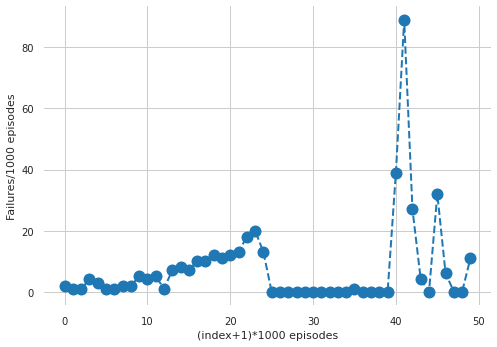

In [24]:
step=100
range_f=end/step
failure=[]
fig, ax = plt.subplots()
for i in range(int(range_f)):
    start=step*i
    episode=np.array(data_test['Episode'].values.tolist()[start:start+step])
    test=np.array(data_test['test'].values.tolist()[start:start+step])
    indices = test == 1
    failure.append(indices.sum())
print('Failures: ',failure)
ax.plot(failure,marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('(index+1)*1000 episodes')
plt.ylabel('Failures/1000 episodes')
ax.grid(True) 
plt.show()   

In [25]:
#data for AVF training:
iteration_start=4700
iteration_end=5000
data=data_test[["Episode", "Kick_Speed","test"]][iteration_start:iteration_end]
std=np.std(data[["Episode", "Kick_Speed"]].values,axis=0)
mean=np.mean(data[["Episode", "Kick_Speed"]].values,axis=0)
np.savez('stdmean.npz',std=std, mean=mean)
data[["Episode", "Kick_Speed"]]=np.divide(np.subtract(data[["Episode", "Kick_Speed"]],mean),std)
print('std is:',std)
print('Mean is:',mean)
data.head()

std is: [86.60205925 11.60680566]
Mean is: [4849.5          37.18806667]


,Episode,Kick_Speed,test
4700,-1.726287,-1.530832,0.0
4701,-1.714740,-0.085128,0.0
4702,-1.703193,0.744557,0.0
4703,-1.691646,-0.131653,0.0
4704,-1.680099,0.962533,0.0


In [27]:
#AVF Training 


X=data[["Episode","Kick_Speed"]].values
print(X.shape)
Y=data["test"]
print(Y.shape)
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#test train split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X[1,:].shape)

#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.997):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Model

model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(2,)), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid )
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500, batch_size=8, callbacks=[callbacks]) ;


(300, 2)
(300,)
(2,)
Epoch 1/500
26/26 [==============================] - 0s 2ms/step - loss: 0.6124 - accuracy: 0.7811
Epoch 2/500
26/26 [==============================] - 0s 2ms/step - loss: 0.3830 - accuracy: 0.9602
Epoch 3/500
26/26 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.9602
Epoch 4/500
26/26 [==============================] - 0s 1ms/step - loss: 0.1907 - accuracy: 0.9602
Epoch 5/500
26/26 [==============================] - 0s 2ms/step - loss: 0.1556 - accuracy: 0.9602
Epoch 6/500
26/26 [==============================] - 0s 1ms/step - loss: 0.1295 - accuracy: 0.9602
Epoch 7/500
26/26 [==============================] - 0s 2ms/step - loss: 0.1160 - accuracy: 0.9602
Epoch 8/500
26/26 [==============================] - 0s 2ms/step - loss: 0.1007 - accuracy: 0.9602
Epoch 9/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9602
Epoch 10/500
26/26 [==============================] - 0s 2ms/step - loss: 0.0814 - accur

In [28]:
results = model.evaluate(x_test, y_test, batch_size=16)
print('test loss, test acc:', results)

7/7 [==============================] - 0s 1ms/step - loss: 0.0432 - accuracy: 0.9899
test loss, test acc: [0.043246231973171234, 0.9898989796638489]


In [29]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [30]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	saved_model.pb	variables


In [31]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [35]:
samples_per_iteration=2000
random_seed=np.random.randint(1,100000)
np.random.seed(random_seed)
candidate_initial_speed=[]
for i in range(samples_per_iteration): 
    #candidate_initial_speed =(9* np.random.randn(samples_per_iteration, 1) + 38).reshape(-1,1)
    candidate_initial_speed.append(np.random.normal(38,11))

candidate_initial_speed=np.array(candidate_initial_speed).reshape(-1,1)
Episode=5000*np.ones((samples_per_iteration,1)).reshape(-1,1)

data=np.concatenate((Episode,candidate_initial_speed),axis=1)
print(data.shape)
print('Data :',data)

container = np.load('stdmean.npz')
data_normalised=np.divide(np.subtract(data,container['mean']),container['std'])
#plt.plot(candidate_initial_speed)

(2000, 2)
Data : [[5000.           35.72621446]
 [5000.           46.7080231 ]
 [5000.           39.33581207]
 ...
 [5000.           35.14223692]
 [5000.           34.56017626]
 [5000.           23.22924623]]


In [36]:
predicted_y=new_model.predict(data_normalised,batch_size=8)
max_value=np.amax(predicted_y)
print(max_value)
print(predicted_y.shape)
array_position=np.where(predicted_y==max_value)[0]
print(array_position)
#print(predicted_y)
#print(np.sort(predicted_y, axis=None) )
data_final=np.concatenate((data[array_position,:],predicted_y[array_position,:]),axis=1)
print(data_final)

0.92201346
(2000, 1)
[825]
[[5.00000000e+03 7.40499901e+01 9.22013462e-01]]


In [37]:
data_final[0][1]

74.04999012851141

In [25]:
a=[1 ,2, 3];
print(a[0:1])

[1]
